# **Newton's Method in Optimization**

In [ ]:
import numpy as np
from math import sin, cos, pi
x1 = 1
x2 = 3
x_k = np.array([[x1],[x2]])
N = 1000
f_current = 2*x1**2 + 2*x2**2 - 17*x2*cos(0.2*pi*x1) - x1*x2
for i in range(N):
    gradian = np.array([[4*x1 + 3.4*pi*x2*sin(0.2*pi*x1) - x2],[4*x2 - 17*cos(0.2*pi*x1) - x1]])
    Hessian = np.matrix([[4 + 0.68*pi**2*x2*cos(0.2*pi*x1) , 3.4*pi*sin(0.2*pi*x1) - 1],[3.4*pi*sin(0.2*pi*x1) - 1 , 4]])
    direction = (np.linalg.inv(Hessian)).dot(gradian)
    x_k = x_k - direction
    x1 = x_k[0,0]
    x2 = x_k[1,0]
    f_new = 2*x1**2 + 2*x2**2 - 17*x2*cos(0.2*pi*x1) - x1*x2
        
print("The minimum point of the cost function is:\n x1 = {}\n x2 = {}".format(x1 , x2))
print("The value of cost function in minimum point is:\n {}".format(f_new))

The minimum point of the cost function is:
 x1 = 0.13087466007249957
 x2 = 4.268357652256218
The value of cost function in minimum point is:
 -36.40349774185023


In [ ]:
import pandas as pd
stepsize = 0.5
x1_list = np.arange(-5,5.5,stepsize)
x2_list = np.arange(0,10.5,stepsize)
distance = np.zeros([len(x1_list), len(x2_list)])
N = 1000
reference = -36.4
for i1 in range(len(x1_list)):
    for i2 in range(len(x2_list)):
        x1 = x1_list[i1]
        x2 = x2_list[i2]
        x_k = np.array([[x1],[x2]])
        for i in range(N):
            gradian = np.array([[4*x1 + 3.4*pi*x2*sin(0.2*pi*x1) - x2],[4*x2 - 17*cos(0.2*pi*x1) - x1]])
            Hessian = np.matrix([[4 + 0.68*pi**2*x2*cos(0.2*pi*x1) , 3.4*pi*sin(0.2*pi*x1) - 1],[3.4*pi*sin(0.2*pi*x1) - 1 , 4]])
            direction = (np.linalg.inv(Hessian)).dot(gradian)
            x_k = x_k - direction
            x1 = x_k[0,0]
            x2 = x_k[1,0]
            f = 2*x1**2 + 2*x2**2 - 17*x2*cos(0.2*pi*x1) - x1*x2
        distance[i1][i2] = abs(f - reference)

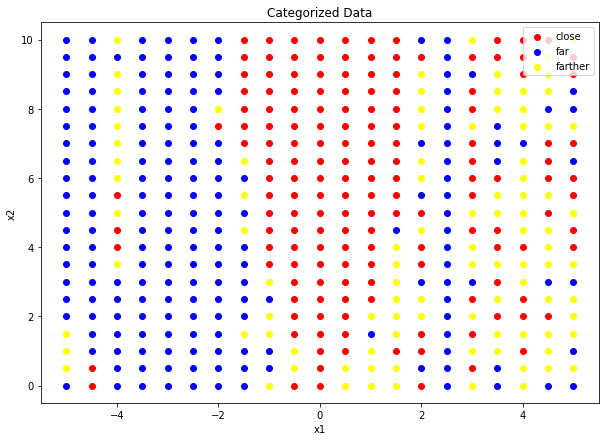

In [ ]:
## Plotting:
x1_close = []
x2_close = []
x1_far = []
x2_far = []
x1_farther = []
x2_farther = []
for i1 in range(len(x1_list)):
    for i2 in range(len(x2_list)):
        if distance[i1][i2] < 5:
          x1_close.append(x1_list[i1])
          x2_close.append(x2_list[i2])
        elif distance[i1][i2] > 5 and distance[i1][i2] < 50:
          x1_far.append(x1_list[i1])
          x2_far.append(x2_list[i2])
        elif distance[i1][i2] > 50:
          x1_farther.append(x1_list[i1])
          x2_farther.append(x2_list[i2])

plt.figure(figsize=(10, 7))
plt.scatter(x1_close,x2_close,marker = 'o',color = 'red')
plt.scatter(x1_far,x2_far,marker = 'o',color = 'blue')
plt.scatter(x1_farther,x2_farther,marker = 'o',color = 'yellow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(["close" , "far" , "farther"])
plt.title("Categorized Data")
plt.show()